In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
df=pd.read_csv('data/placement.csv')

In [18]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [19]:
df.columns

Index(['Unnamed: 0', 'cgpa', 'iq', 'placement'], dtype='object')

In [20]:
df.iq.value_counts()

iq
132.0    4
114.0    3
141.0    3
112.0    3
90.0     3
        ..
106.0    1
89.0     1
161.0    1
135.0    1
113.0    1
Name: count, Length: 71, dtype: int64

In [21]:
df.isnull().sum()

Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [23]:
df.shape

(100, 4)

In [24]:
df.describe()

,Unnamed: 0,cgpa,iq,placement
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,5.991000,123.580000,0.500000
std,29.011492,1.143634,39.944198,0.502519
min,0.000000,3.300000,37.000000,0.000000
25%,24.750000,5.075000,101.500000,0.000000
50%,49.500000,6.000000,127.500000,0.500000
75%,74.250000,6.900000,149.000000,1.000000
max,99.000000,8.500000,233.000000,1.000000


In [25]:
df.placement.value_counts()

placement
1    50
0    50
Name: count, dtype: int64

In [26]:
type(df.iq)

pandas.core.series.Series

In [30]:
df.drop(columns=['Unnamed: 0'],inplace=True)


In [31]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


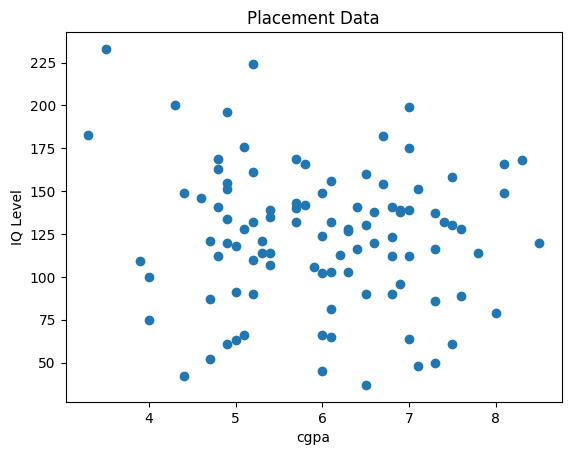

In [32]:
plt.title('Placement Data')
plt.xlabel('cgpa')
plt.ylabel('IQ Level')
plt.scatter(x=df['cgpa'],y=df['iq'])
# c is category
plt.show()

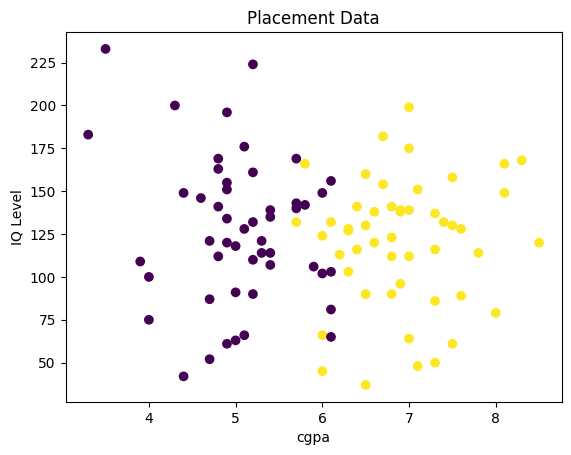

In [33]:
plt.title('Placement Data')
plt.xlabel('cgpa')
plt.ylabel('IQ Level')
plt.scatter(x=df['cgpa'],y=df['iq'],c=df['placement'])
plt.savefig('placementscatterplot')
# c is category
plt.show()

In [34]:
# now separate dependent and independent variable
x=df.drop(columns=['placement'])
y=df['placement']

In [36]:
# now select model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [38]:
from sklearn.linear_model import LogisticRegression
class_model=LogisticRegression()

In [39]:
class_model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [40]:
y_pred=class_model.predict(X_test)

In [41]:
pd.DataFrame({'y_test':y_test,'y_pred':y_pred})

,y_test,y_pred
79,1,1
75,0,0
63,1,1
15,0,0
38,1,1
11,1,1
40,0,0
45,1,0
39,0,0
62,0,0


In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('ACCURACY SCORE',accuracy_score(y_test,y_pred)) 
print('CONFUSION  MATRIX \n',confusion_matrix(y_test,y_pred)) 
print('CLASSIFICATION  REPORT \n',classification_report(y_test,y_pred)) 

ACCURACY SCORE 0.9
CONFUSION  MATRIX 
 [[12  1]
 [ 1  6]]
CLASSIFICATION  REPORT 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.86      0.86      0.86         7

    accuracy                           0.90        20
   macro avg       0.89      0.89      0.89        20
weighted avg       0.90      0.90      0.90        20



Logistic Regression
Logistic Regression is a popular algorithm used for binary classification problems, where the target variable is categorical with two classes. It models the probability of the target

Classification in machine learning is a supervised learning technique where an algorithm is trained with labeled data to predict the category of new data.

The confusion matrix is the easiest way to measure the performance of a classification problem where the output can be of two or more type of classes. A confusion matrix is nothing but a table with two dimensions viz. "Actual" and "Predicted" and furthermore, both the dimensions have "True Positives (TP)", "True Negatives (TN)", "False Positives (FP)", "False Negatives (FN)" as shown below −

True Positives (TP) − It is the case when both actual class & predicted class of data point is 1.
True Negatives (TN) − It is the case when both actual class & predicted class of data point is 0.
False Positives (FP) − It is the case when actual class of data point is 0 & predicted class of data point is 1.
False Negatives (FN) − It is the case when actual class of data point is 1 & predicted class of data point is 0.


Accuracy
It may be defined as the number of correct predictions made by our ML model. We can easily calculate it by confusion matrix 

Precision, used in document retrievals, may be defined as the number of correct documents returned by our ML model. We can easily calculate it by confusion matrix

Recall or Sensitivity
Recall may be defined as the number of positives returned by our ML model. 